# Imports

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Plotting presets

In [8]:
figsize = (2,2)
markersize=8
elinewidth=1
markerscale=1.5

color_map = {
    'random': 'gray',
    'cryodrgn': '#6190e6',
    'drgnai-fixed': '#88B4E6',
    'opusdsd_mu': '#b0e0e6',
    'cryosparc-3dflex': '#98fb98',
    'cryosparc-3dva': '#f4a460',
    'recovar': '#f08080',
    'cryodrgn2': '#7b68ee',
    'drgnai-abinit': '#a569bd',
   'cryosparc-3d': '#d8bfd8',
   'cryosparc-3dabinit': '#da70d6',
#    'G.T': '#bfbfbf'
}


label_map = {
    'random': 'Random Shuffle',
    'cryodrgn': 'CryoDRGN',
    'drgnai-fixed': 'DRGN-AI-fixed',
    'opusdsd_mu': 'Opus-DSD',
    'cryosparc-3dflex': '3DFlex',
    'cryosparc-3dva': '3DVA',
    'recovar': 'RECOVAR',
    'cryosparc-3d': '3D Class',
    'cryodrgn2': 'CryoDRGN2',
    'drgnai-abinit': 'DRGN-AI',
    'cryosparc-3dabinit': '3D Class abinit',
    }


marker_map = {
    'cryodrgn': '+',
    'drgnai-fixed': '.',
    'opusdsd_mu': 'p',
    'cryosparc-3dflex': '8',
    'cryosparc-3dva': 's',
    'recovar': 'D',
    'cryosparc-3d': 'x',
    'cryodrgn2': 'P',
    'drgnai-abinit': 'o',
    'cryosparc-3dabinit': 'X',
    }


# conf-het-1

In [85]:
results_df = pd.read_csv('confhet1_information_imbalance.csv')

In [86]:
k = 30
results_df = results_df[results_df['k'] <= k]



In [ ]:
results_df = pd.merge(
    results_df.groupby(['label_1', 'label_2']).mean().reset_index().drop(['k'], axis=1),
results_df.groupby(['label_1', 'label_2']).std().reset_index().rename(columns={'infor_imb_12':'infor_imb_12_std', 'infor_imb_21': 'infor_imb_21_std'}).drop(['k', 'uniq'], axis=1)
)



## het

ground-truth-heterogeneity-s1-smear cryodrgn
ground-truth-heterogeneity-s1-smear drgnai-fixed
ground-truth-heterogeneity-s1-smear opusdsd_mu
ground-truth-heterogeneity-s1-smear cryosparc-3dflex
ground-truth-heterogeneity-s1-smear cryosparc-3dva
ground-truth-heterogeneity-s1-smear recovar
ground-truth-heterogeneity-s1-smear cryosparc-3d
ground-truth-heterogeneity-s1-smear cryodrgn2
ground-truth-heterogeneity-s1-smear drgnai-abinit
ground-truth-heterogeneity-s1-smear cryosparc-3dabinit


<Figure size 640x480 with 0 Axes>

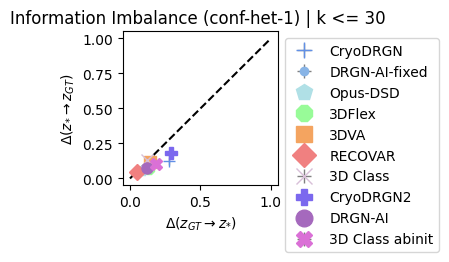

In [88]:
plt.tight_layout()
uniq_labels_1 = ['ground-truth-heterogeneity-s1-smear']
uniq_labels_2 = list(label_map.keys()) 



legend_labels = {'ground-truth-pose-R3x3': 'Pose', 'ground-truth-ctf': 'CTF', 'ground-truth-heterogeneity-s1-smear': 'Het. smear',
                 'ground-truth-heterogeneity': 'Het.'}


fig, ax = plt.subplots(figsize=figsize)

for i, label_1 in enumerate(uniq_labels_1):
    for j, label_2 in enumerate(uniq_labels_2):
        if label_1 == label_2 or label_2 in uniq_labels_1:
            continue
        print(label_1, label_2)
        data = results_df[np.logical_and(results_df['label_1'] == label_1, results_df['label_2'] == label_2)]
        ax.errorbar(x='infor_imb_12', y='infor_imb_21', xerr=data['infor_imb_12_std'], yerr=data['infor_imb_21_std'], fmt=marker_map[label_2], 
                    rasterized=True,
                    markersize=markersize,
                    color=color_map[label_2], 
                    ecolor='gray',
                    elinewidth=elinewidth,
                    data=data, 
                    label=label_map[label_2]
                    )

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title_fontsize='large', fontsize='medium', markerscale=1.5)


plt.plot([0, 1], [0, 1], "k--")

plt.xlabel(r"$\Delta(z_{GT} \rightarrow z_{*}) $", )
plt.ylabel(r"$\Delta(z_{*} \rightarrow z_{GT}) $",)
plt.title(f'Information Imbalance (conf-het-1) | k <= {k} ',)

plt.savefig('conf-het-1/snr001/information_imbalance.pdf', dpi=1200, bbox_inches='tight')


## pose

ground-truth-pose-R3x3 cryodrgn
ground-truth-pose-R3x3 drgnai-fixed
ground-truth-pose-R3x3 opusdsd_mu
ground-truth-pose-R3x3 cryosparc-3dflex
ground-truth-pose-R3x3 cryosparc-3dva
ground-truth-pose-R3x3 recovar
ground-truth-pose-R3x3 cryosparc-3d
ground-truth-pose-R3x3 cryodrgn2
ground-truth-pose-R3x3 drgnai-abinit
ground-truth-pose-R3x3 cryosparc-3dabinit


<Figure size 640x480 with 0 Axes>

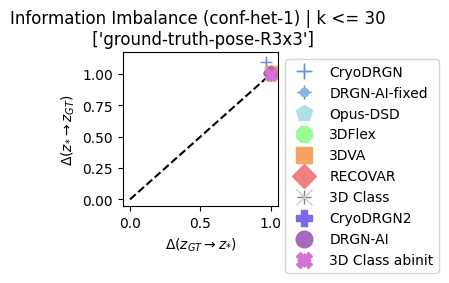

In [90]:
plt.tight_layout()
uniq_labels_1 = ['ground-truth-pose-R3x3']
uniq_labels_2 = list(label_map.keys()) 



legend_labels = {'ground-truth-pose-R3x3': 'Pose', 'ground-truth-ctf': 'CTF', 'ground-truth-heterogeneity-s1-smear': 'Het. smear',
                 'ground-truth-heterogeneity': 'Het.'}


fig, ax = plt.subplots(figsize=figsize)

for i, label_1 in enumerate(uniq_labels_1):
    for j, label_2 in enumerate(uniq_labels_2):
        if label_1 == label_2 or label_2 in uniq_labels_1:
            continue
        print(label_1, label_2)
        data = results_df[np.logical_and(results_df['label_1'] == label_1, results_df['label_2'] == label_2)]
        ax.errorbar(x='infor_imb_12', y='infor_imb_21', xerr=data['infor_imb_12_std'], yerr=data['infor_imb_21_std'], fmt=marker_map[label_2], 
                    rasterized=True,
                    markersize=markersize,
                    color=color_map[label_2], 
                    ecolor='gray',
                    elinewidth=elinewidth,
                    data=data, 
                    label=label_map[label_2]
                    )

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title_fontsize='large', fontsize='medium', markerscale=1.5)


plt.plot([0, 1], [0, 1], "k--")

plt.xlabel(r"$\Delta(z_{GT} \rightarrow z_{*}) $", )
plt.ylabel(r"$\Delta(z_{*} \rightarrow z_{GT}) $",)
plt.title(f'Information Imbalance (conf-het-1) | k <= {k} \n {uniq_labels_1}',)

plt.savefig('confhet1_information_imbalance_pose.pdf', dpi=1200, bbox_inches='tight')


### zoom

ground-truth-pose-R3x3 cryodrgn
ground-truth-pose-R3x3 drgnai-fixed
ground-truth-pose-R3x3 opusdsd_mu
ground-truth-pose-R3x3 cryosparc-3dflex
ground-truth-pose-R3x3 cryosparc-3dva
ground-truth-pose-R3x3 recovar
ground-truth-pose-R3x3 cryosparc-3d
ground-truth-pose-R3x3 cryodrgn2
ground-truth-pose-R3x3 drgnai-abinit
ground-truth-pose-R3x3 cryosparc-3dabinit


<Figure size 640x480 with 0 Axes>

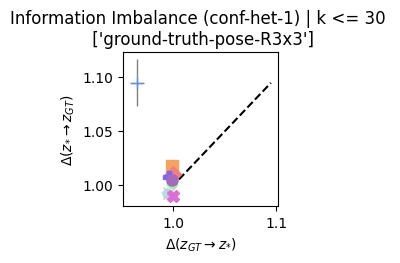

In [91]:
plt.tight_layout()
uniq_labels_1 = ['ground-truth-pose-R3x3']
uniq_labels_2 = list(label_map.keys()) 



legend_labels = {'ground-truth-pose-R3x3': 'Pose', 'ground-truth-ctf': 'CTF', 'ground-truth-heterogeneity-s1-smear': 'Het. smear',
                 'ground-truth-heterogeneity': 'Het.'}


fig, ax = plt.subplots(figsize=figsize)
minimum = np.inf
maximum = -np.inf

for i, label_1 in enumerate(uniq_labels_1):
    for j, label_2 in enumerate(uniq_labels_2):
        if label_1 == label_2 or label_2 in uniq_labels_1:
            continue
        print(label_1, label_2)
        data = results_df[np.logical_and(results_df['label_1'] == label_1, results_df['label_2'] == label_2)]
        ax.errorbar(x='infor_imb_12', y='infor_imb_21', xerr=data['infor_imb_12_std'], yerr=data['infor_imb_21_std'], fmt=marker_map[label_2], 
                    rasterized=True,
                    markersize=markersize,
                    color=color_map[label_2], 
                    ecolor='gray',
                    elinewidth=elinewidth,
                    data=data, 
                    label=label_map[label_2]
                    )
        putative_minimum = data[['infor_imb_21','infor_imb_21']].min().min()
        putative_maximum = data[['infor_imb_21','infor_imb_21']].max().max()
        if putative_minimum < minimum:
            minimum = putative_minimum
        if putative_maximum > maximum:
            maximum = putative_maximum

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), title_fontsize='large', fontsize='medium', markerscale=1.5)

plt.plot([minimum, maximum], [minimum, maximum], "k--")

plt.xlabel(r"$\Delta(z_{GT} \rightarrow z_{*}) $", )
plt.ylabel(r"$\Delta(z_{*} \rightarrow z_{GT}) $",)
plt.title(f'Information Imbalance (conf-het-1) | k <= {k} \n {uniq_labels_1}',)

plt.savefig('conf-het-1/snr001/confhet1_information_imbalance_pose_zoom.pdf', dpi=1200, bbox_inches='tight')


## ctf

ground-truth-ctf cryodrgn
ground-truth-ctf drgnai-fixed
ground-truth-ctf opusdsd_mu
ground-truth-ctf cryosparc-3dflex
ground-truth-ctf cryosparc-3dva
ground-truth-ctf recovar
ground-truth-ctf cryosparc-3d
ground-truth-ctf cryodrgn2
ground-truth-ctf drgnai-abinit
ground-truth-ctf cryosparc-3dabinit


<Figure size 640x480 with 0 Axes>

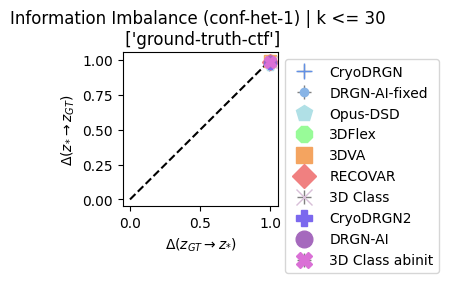

In [92]:
plt.tight_layout()
uniq_labels_1 = ['ground-truth-ctf']
uniq_labels_2 = list(label_map.keys()) 



legend_labels = {'ground-truth-pose-R3x3': 'Pose', 'ground-truth-ctf': 'CTF', 'ground-truth-heterogeneity-s1-smear': 'Het. smear',
                 'ground-truth-heterogeneity': 'Het.'}


fig, ax = plt.subplots(figsize=figsize)

for i, label_1 in enumerate(uniq_labels_1):
    for j, label_2 in enumerate(uniq_labels_2):
        if label_1 == label_2 or label_2 in uniq_labels_1:
            continue
        print(label_1, label_2)
        data = results_df[np.logical_and(results_df['label_1'] == label_1, results_df['label_2'] == label_2)]
        ax.errorbar(x='infor_imb_12', y='infor_imb_21', xerr=data['infor_imb_12_std'], yerr=data['infor_imb_21_std'], fmt=marker_map[label_2], 
                    rasterized=True,
                    markersize=markersize,
                    color=color_map[label_2], 
                    ecolor='gray',
                    elinewidth=elinewidth,
                    data=data, 
                    label=label_map[label_2]
                    )

plt.legend(loc='upper left', bbox_to_anchor=(1,1), title_fontsize='large', fontsize='medium', markerscale=1.5)


plt.plot([0, 1], [0, 1], "k--")

plt.xlabel(r"$\Delta(z_{GT} \rightarrow z_{*}) $", )
plt.ylabel(r"$\Delta(z_{*} \rightarrow z_{GT}) $",)
plt.title(f'Information Imbalance (conf-het-1) | k <= {k} \n {uniq_labels_1}',)

plt.savefig('conf-het-1/snr001/confhet1_information_imbalance_ctf.pdf', dpi=1200, bbox_inches='tight')


### zoom

ground-truth-ctf cryodrgn
ground-truth-ctf drgnai-fixed
ground-truth-ctf opusdsd_mu
ground-truth-ctf cryosparc-3dflex
ground-truth-ctf cryosparc-3dva
ground-truth-ctf recovar
ground-truth-ctf cryosparc-3d
ground-truth-ctf cryodrgn2
ground-truth-ctf drgnai-abinit
ground-truth-ctf cryosparc-3dabinit


<Figure size 640x480 with 0 Axes>

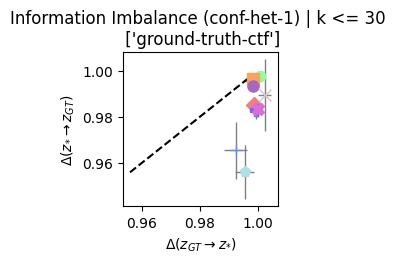

In [93]:
plt.tight_layout()
uniq_labels_1 = ['ground-truth-ctf']
uniq_labels_2 = list(label_map.keys()) 



legend_labels = {'ground-truth-pose-R3x3': 'Pose', 'ground-truth-ctf': 'CTF', 'ground-truth-heterogeneity-s1-smear': 'Het. smear',
                 'ground-truth-heterogeneity': 'Het.'}


fig, ax = plt.subplots(figsize=figsize)
minimum = np.inf
maximum = -np.inf

for i, label_1 in enumerate(uniq_labels_1):
    for j, label_2 in enumerate(uniq_labels_2):
        if label_1 == label_2 or label_2 in uniq_labels_1:
            continue
        print(label_1, label_2)
        data = results_df[np.logical_and(results_df['label_1'] == label_1, results_df['label_2'] == label_2)]
        ax.errorbar(x='infor_imb_12', y='infor_imb_21', xerr=data['infor_imb_12_std'], yerr=data['infor_imb_21_std'], fmt=marker_map[label_2], 
                    rasterized=True,
                    markersize=markersize,
                    color=color_map[label_2], 
                    ecolor='gray',
                    elinewidth=elinewidth,
                    data=data, 
                    label=label_map[label_2]
                    )
        putative_minimum = data[['infor_imb_21','infor_imb_21']].min().min()
        putative_maximum = data[['infor_imb_21','infor_imb_21']].max().max()
        if putative_minimum < minimum:
            minimum = putative_minimum
        if putative_maximum > maximum:
            maximum = putative_maximum

# plt.legend(loc='upper left', bbox_to_anchor=(1,1), title_fontsize='large', fontsize='medium', markerscale=1.5)

plt.plot([minimum, maximum], [minimum, maximum], "k--")

plt.xlabel(r"$\Delta(z_{GT} \rightarrow z_{*}) $", )
plt.ylabel(r"$\Delta(z_{*} \rightarrow z_{GT}) $",)
plt.title(f'Information Imbalance (conf-het-1) | k <= {k} \n {uniq_labels_1}',)

plt.savefig('conf-het-1/snr001/confhet1_information_imbalance_ctf_zoom.pdf', dpi=1200, bbox_inches='tight')
